**Goal: To predict the price of diamonds based on their characteristics**

**Libraries**

In [45]:
# for operation
import numpy as np
import pandas as pd
import tools.clean as clean

# for visualization
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (12, 8)})
sns.set_style('whitegrid')

---

# Exploration

In [2]:
# importing dataset
diamonds = pd.read_csv('../dataset/train/train.csv', index_col = 'id') # specify column 'id' as index

In [4]:
# having a look
diamonds

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.02,Good,D,VS2,63.2,58.0,6.36,6.40,4.03,8.928
1,0.35,Very Good,H,VVS2,61.0,57.0,4.54,4.57,2.77,6.477
2,0.31,Premium,H,VVS1,60.5,58.0,4.43,4.40,2.67,6.810
3,0.38,Ideal,E,VS1,61.4,56.0,4.66,4.69,2.87,6.824
4,1.64,Ideal,G,VVS2,61.8,56.0,7.59,7.60,4.69,9.776
...,...,...,...,...,...,...,...,...,...,...
40450,1.20,Ideal,G,VVS2,62.2,55.0,6.77,6.81,4.23,9.149
40451,1.50,Good,H,VS1,64.2,56.0,7.30,7.09,4.62,9.077
40452,1.06,Ideal,E,VS2,61.9,55.0,6.54,6.58,4.06,8.892


In [5]:
# checking if there are missing values
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
# explore types of data
diamonds.dtypes # data seems to be in appropriate types, we'll need to encode objects for ML models

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [7]:
diamonds.describe() # min values of 'x','y',z' of zero shouldn't be possible

,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.00000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.796804,61.748931,57.45542,5.728265,5.731191,3.537018,7.785115
std,0.473977,1.428056,2.23662,1.121565,1.120826,0.709230,1.014267
min,0.200000,43.000000,43.00000,0.000000,0.000000,0.000000,5.787000
25%,0.400000,61.000000,56.00000,4.710000,4.720000,2.910000,6.851000
50%,0.700000,61.800000,57.00000,5.690000,5.710000,3.520000,7.782000
75%,1.040000,62.500000,59.00000,6.540000,6.540000,4.040000,8.578000
max,5.010000,79.000000,95.00000,10.740000,31.800000,31.800000,9.843000


In [8]:
# designing a filter to show those that equal 0
show_zeros = (diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z'] == 0)
print(diamonds[show_zeros].shape) # there are a total of 15 with zeros, mostly in z
diamonds[show_zeros] # we can drop them as they seem impossible measurements and there are not that many

(15, 10)


,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
1363,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,8.061
5336,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0,8.624
6252,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0,8.508
7143,2.80,Good,G,SI2,63.8,58.0,8.90,8.85,0.0,9.841
9587,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,7.664
17324,2.25,Premium,I,SI1,61.3,58.0,8.52,8.42,0.0,9.642
27284,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,9.756
27841,1.50,Good,G,I1,64.0,61.0,7.15,7.04,0.0,8.462
28012,1.20,Premium,D,VVS1,62.1,59.0,0.00,0.00,0.0,9.661


In [9]:
keep_values = (diamonds['x'] != 0) & (diamonds['y'] != 0) & (diamonds['z'] != 0)
diamonds = diamonds[keep_values]
diamonds.shape

(40440, 10)

# Encoding categorical data: cut, color, clarity

In [10]:
# explore cut, color and clarity
# each quality within these categories reflects how good a diamond is
diamonds.cut.unique() # ordered: worst- (Fair, Good, Very Good, Premium, Ideal) -best
diamonds.color.unique() # ordered: worst- (J, I, H, G, F, E, D) -best
diamonds.clarity.unique() # ordered: worst- (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF, FL) -best

array(['VS2', 'VVS2', 'VVS1', 'VS1', 'SI1', 'SI2', 'I1', 'IF'],
      dtype=object)

In [11]:
diamonds = clean.encode_categorical(diamonds) # apply a function to encode categories

In [12]:
diamonds.head() # verifying

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.02,1,6,3,63.2,58.0,6.36,6.40,4.03,8.928
1,0.35,2,2,5,61.0,57.0,4.54,4.57,2.77,6.477
2,0.31,3,2,6,60.5,58.0,4.43,4.40,2.67,6.810
3,0.38,4,5,4,61.4,56.0,4.66,4.69,2.87,6.824
4,1.64,4,3,5,61.8,56.0,7.59,7.60,4.69,9.776


In [13]:
# let's export the dataset before removing any outliers
diamonds.to_csv('../dataset/diamonds_with_outliers.csv')

# Plotting any relationship between price and the rest of categories

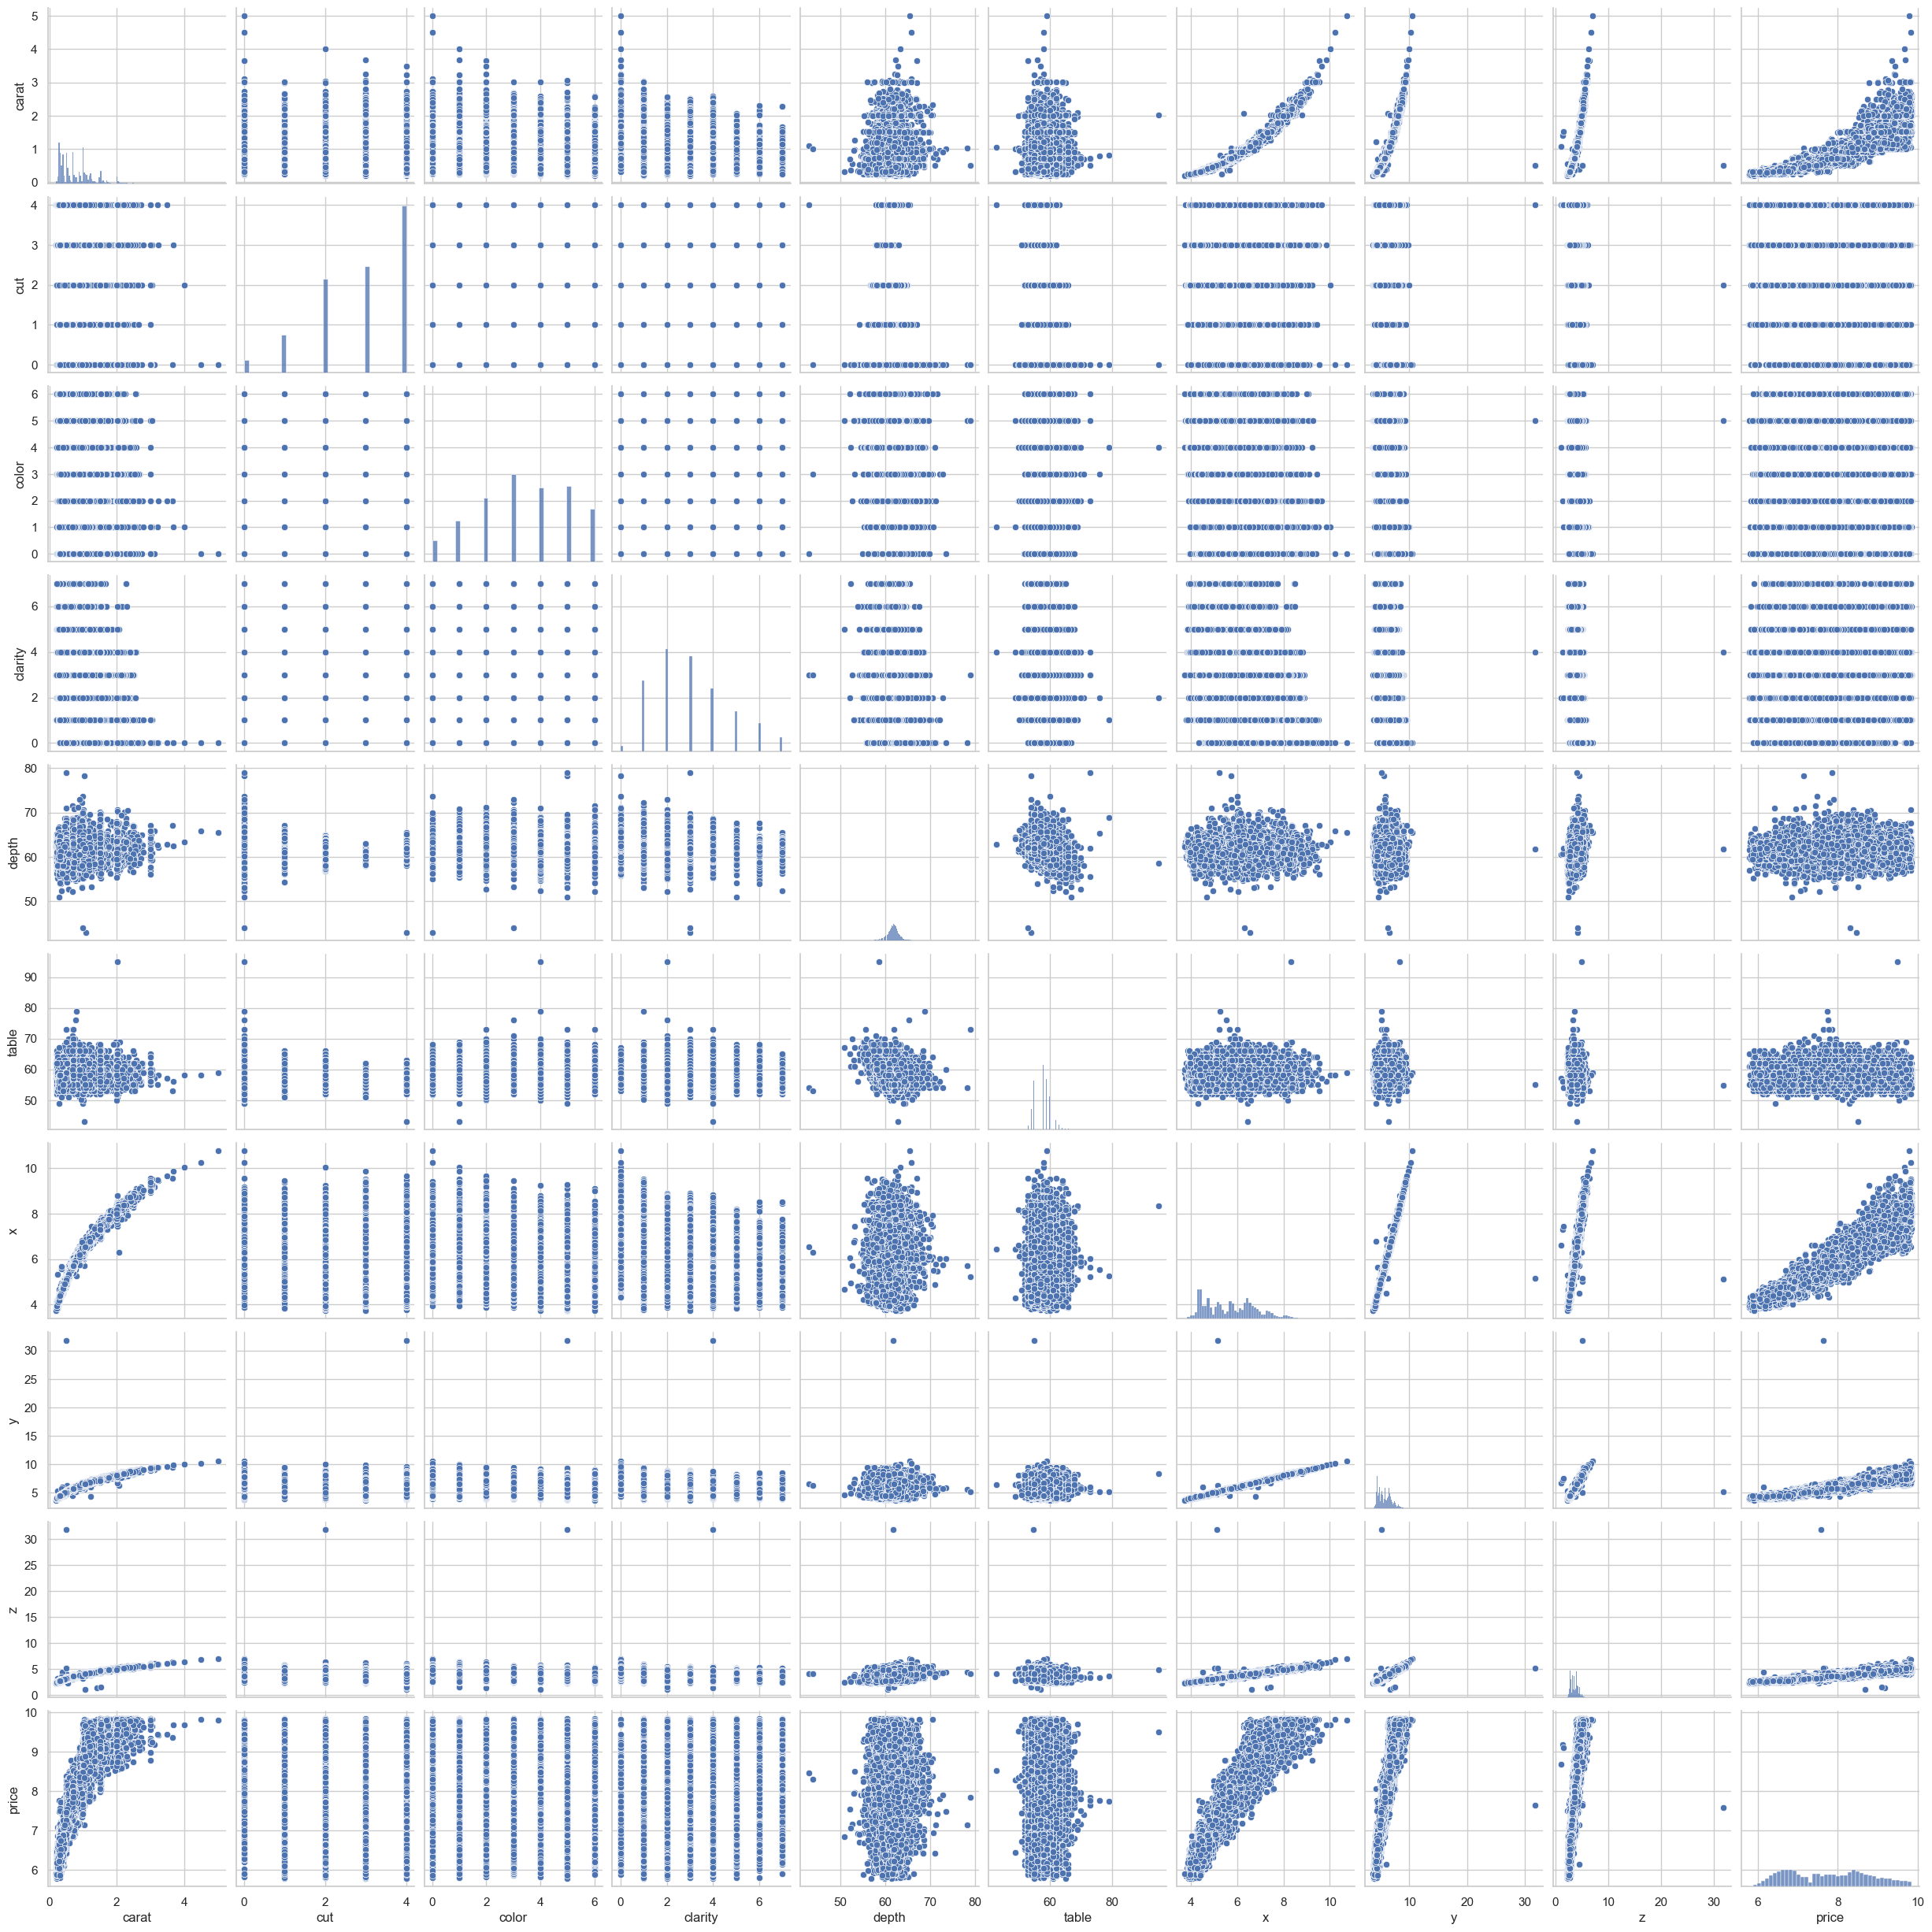

In [14]:
sns.pairplot(diamonds);

**Plotting all variables against price to see any correlation**

In [31]:
variables = diamonds.columns[:-1].to_list() # cast all variables except price to a list

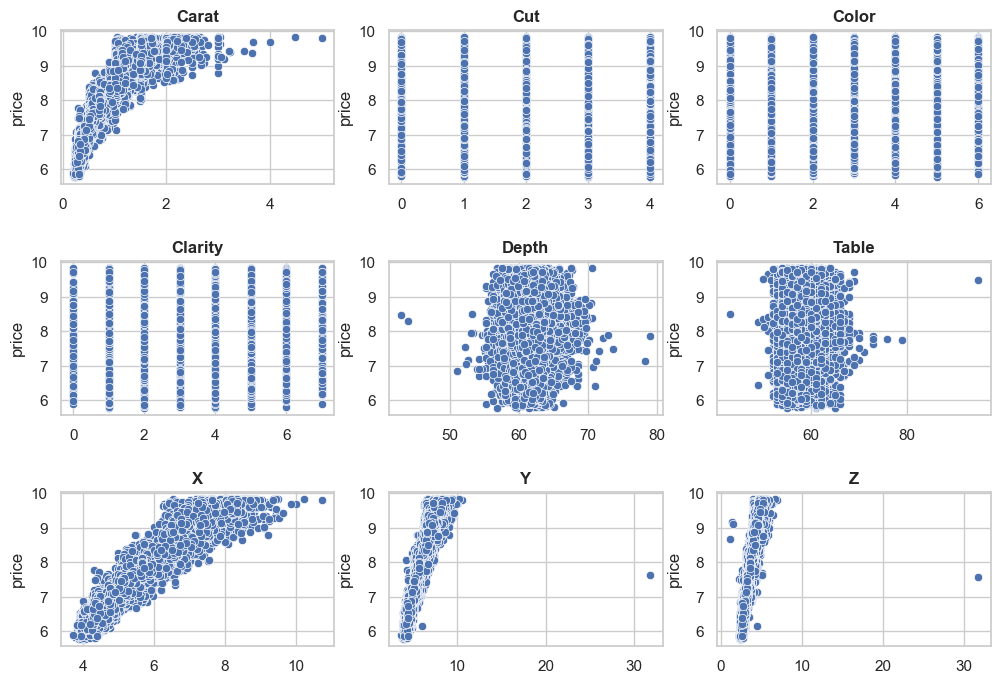

In [47]:
fig, axs = plt.subplots(nrows=3, ncols=3)
plt.subplots_adjust(hspace=0.5)

# loop through the variables and flattened axes
for variable, ax in zip(variables, axs.ravel()):
    # filter df for that variable and plot on specified axes
    sns.scatterplot(data=diamonds[[variable, "price"]], x=variable, y="price", ax=ax)
    # chart formatting
    ax.set_title(variable.title(), fontweight="bold")
    ax.set_xlabel("")
    
plt.savefig('./output/scatter_variables.jpg', dpi=1000, bbox_inches='tight');

In [43]:
diamonds.corr() # to see correlation between variables

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.136117,-0.290953,-0.354046,0.029793,0.182444,0.977834,0.970002,0.956078,0.920152
cut,-0.136117,1.000000,0.020566,0.192306,-0.219152,-0.433785,-0.127917,-0.126295,-0.151955,-0.089460
color,-0.290953,0.020566,1.000000,-0.027646,-0.045873,-0.026632,-0.269794,-0.267370,-0.267439,-0.153721
clarity,-0.354046,0.192306,-0.027646,1.000000,-0.068602,-0.162880,-0.374694,-0.366360,-0.369858,-0.215885
depth,0.029793,-0.219152,-0.045873,-0.068602,1.000000,-0.292496,-0.023334,-0.026564,0.095830,0.002503
table,0.182444,-0.433785,-0.026632,-0.162880,-0.292496,1.000000,0.196386,0.188513,0.152530,0.158728
x,0.977834,-0.127917,-0.269794,-0.374694,-0.023334,0.196386,1.000000,0.991769,0.970597,0.960777
y,0.970002,-0.126295,-0.267370,-0.366360,-0.026564,0.188513,0.991769,1.000000,0.964997,0.955007
z,0.956078,-0.151955,-0.267439,-0.369858,0.095830,0.152530,0.970597,0.964997,1.000000,0.937079
price,0.920152,-0.089460,-0.153721,-0.215885,0.002503,0.158728,0.960777,0.955007,0.937079,1.000000


**Removing outliers**

In [14]:
# looks like price is positively correlated to: carat, 'x', 'y', 'z'
# there seem to be outliers -lets remove them

cols = diamonds.columns.to_list()
for col in cols:
    diamonds = clean.remove_outliers(diamonds, col)

In [15]:
diamonds.shape # 5401 values removed

(35039, 10)

In [16]:
# let's export the cleaner dataset
diamonds.to_csv('../dataset/diamonds_without_outliers.csv')